<a href="https://colab.research.google.com/github/AIMuayya08/Pembelajaran-Mesin_Muhammad-Muayyadillah_2211533008/blob/main/Pekan_2_tugas_Praktikum_ML_Logistic_Regresion_Muhammad_Muayyadillah_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Load the dataset

marketing_campaigns = pd.read_csv('Marketingcampaigns.csv')

# Display the first few rows of the dataset
print(marketing_campaigns.head())

   Customer id  Age  Gender  Location  Email Opened  Email Clicked  \
0            1   22       0     Perth             1              1   
1            2   55       0  Auckland             1              0   
2            3   15       1    Sydney             0              1   
3            4   25       0  Brisbane             1              1   
4            5   36       1  Brisbane             0              1   

   Product page visit  Discount offered  Purchased  
0                   3                 1          1  
1                   0                 0          0  
2                   2                 1          1  
3                   5                 1          0  
4                   1                 1          0  


In [66]:
# Assume the last column is the label and the rest are features
X = marketing_campaigns.iloc[:, :-1].values
y = marketing_campaigns.iloc[:, -1].values


In [67]:
# Define a function to plot the dataset
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bs")
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


In [68]:
# Define a function to plot the decision boundaries
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.2)


In [70]:
# Use only the first two features for visualization purposes
X_vis = X[:, :2]

# Create and fit the pipeline
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])
polynomial_svm_clf.fit(X_vis, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

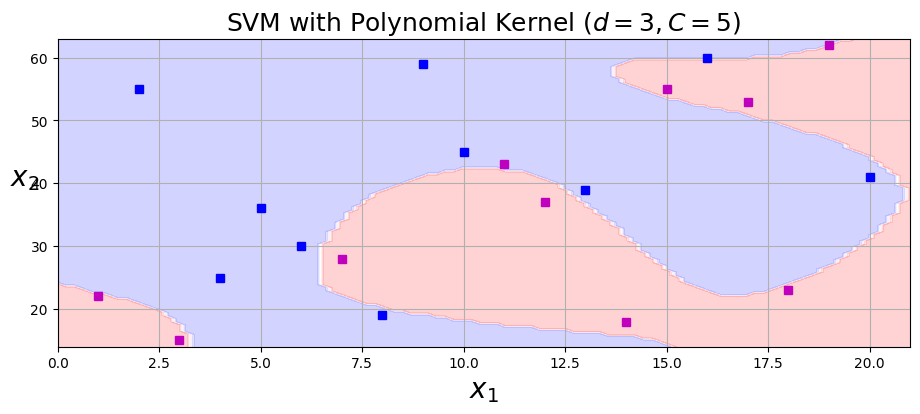

In [71]:
# Plot the results
plt.figure(figsize=(11, 4))
plot_predictions(polynomial_svm_clf, [X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1])
plot_dataset(X_vis, y, [X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1])
plt.title(r"SVM with Polynomial Kernel ($d=3, C=5$)", fontsize=18)
plt.show()